<a href="https://colab.research.google.com/github/bharath7896/pro-1/blob/master/Quora_Case_Study_Solution__(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1> 5. Assignments </h1>

1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.
2. Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss.


## 5.1 Reading data from file

In [0]:
# import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc
import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score,log_loss
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

In [0]:
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive')

In [0]:
cd /content/gdrive/My Drive

In [0]:
data1 = pd.read_csv("nlp_features_train.csv",encoding='latin-1')

In [0]:
data1.head()

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,0.399992,0.333328,0.399992,0.249997,...,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,0.399992,0.199998,0.999950,0.666644,...,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000


In [0]:
data2 = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')

In [0]:
data2.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [0]:
df1 = data1.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df2 = data2.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = data1[['id','question1','question2']]
duplicate = data1.is_duplicate

In [0]:
df1.columns

Index(['id', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

In [0]:
df2.columns

Index(['id', 'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words',
       'q2_n_words', 'word_Common', 'word_Total', 'word_share', 'freq_q1+q2',
       'freq_q1-q2'],
      dtype='object')

In [0]:
df3.columns

Index(['id', 'question1', 'question2'], dtype='object')

In [0]:
df3 = df3.fillna(' ')
df4 = pd.DataFrame()
df4['Text'] = df3.question1 + ' ' + df3.question2
df4['id'] = df3.id

In [0]:
df2['id']=df1['id']
df4['id']=df1['id']

In [0]:
df5 = df1.merge(df2, on='id',how='left')
final = df5.merge(df4, on='id',how='left')

In [0]:
final.columns

Index(['id', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2', 'Text'],
      dtype='object')

In [0]:
final = final.drop('id',axis=1)

In [0]:
final.shape

(404290, 27)

## 5.2 Random train test split

In [0]:
X_train_tf,X_test_tf, y_train_tf, y_test_tf = train_test_split(final,duplicate, stratify=duplicate)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1,3),max_features=200000,min_df=0.000032)
train_tfidf = tfidf_vect.fit_transform(X_train_tf.Text)
test_tfidf = tfidf_vect.transform(X_test_tf.Text)
print('No of Tfidf features:',len(tfidf_vect.get_feature_names()))

No of Tfidf features: 131529


In [0]:
X_train_tf1 = X_train_tf.drop('Text',axis=1)
X_test_tf1 = X_test_tf.drop('Text',axis=1)

In [0]:
from scipy.sparse import hstack
X_train1 = hstack((X_train_tf1.values,train_tfidf))
X_test1 = hstack((X_test_tf1.values,test_tfidf))

In [0]:
X_train1

<303217x131555 sparse matrix of type '<class 'numpy.float64'>'
	with 17295739 stored elements in COOrdinate format>

In [0]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler(with_mean=False)
X_train_sc = scale.fit_transform(X_train1)
X_test_sc = scale.transform(X_test1)

In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

## 5.3 Logistic Regression with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.44497069113164167
For values of alpha =  0.0001 The log loss is: 0.4436868348533212
For values of alpha =  0.001 The log loss is: 0.43743149853561936
For values of alpha =  0.01 The log loss is: 0.41145770615035543
For values of alpha =  0.1 The log loss is: 0.3822953397579647
For values of alpha =  1 The log loss is: 0.4006907083248526
For values of alpha =  10 The log loss is: 0.45983851148362404


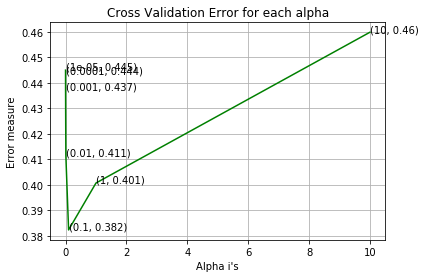

For values of best alpha =  0.1 The train log loss is: 0.26672528864755474
For values of best alpha =  0.1 The test log loss is: 0.3822953397579647
Total number of data points : 101073


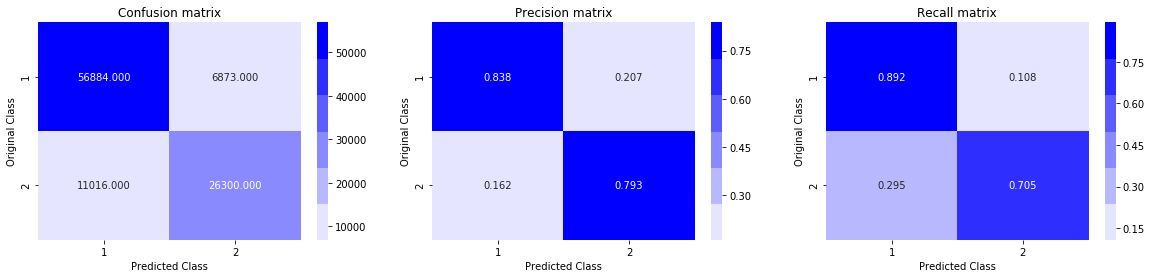

Wall time: 6min 9s


In [0]:
%%time
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train_sc, y_train_tf)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train_tf)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test_tf, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test_tf, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_sc, y_train_tf)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train_tf)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tf, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tf, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_tf, predicted_y)

## 5.4 Linear SVM with hyperparameter tuning 

For values of alpha =  1e-05 The log loss is: 0.4441656179651442
For values of alpha =  0.0001 The log loss is: 0.4433613968344315
For values of alpha =  0.001 The log loss is: 0.44156543138720733
For values of alpha =  0.01 The log loss is: 0.4342230423066317
For values of alpha =  0.1 The log loss is: 0.4067742304043786
For values of alpha =  1 The log loss is: 0.3964299794642901
For values of alpha =  10 The log loss is: 0.471783243611753


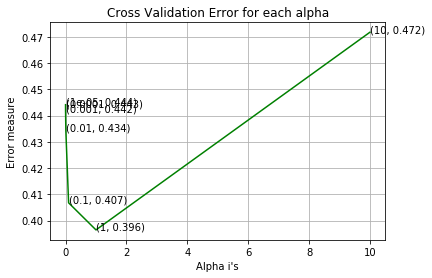

For values of best alpha =  1 The train log loss is: 0.3052788509129974
For values of best alpha =  1 The test log loss is: 0.3964299794642901
Total number of data points : 101073


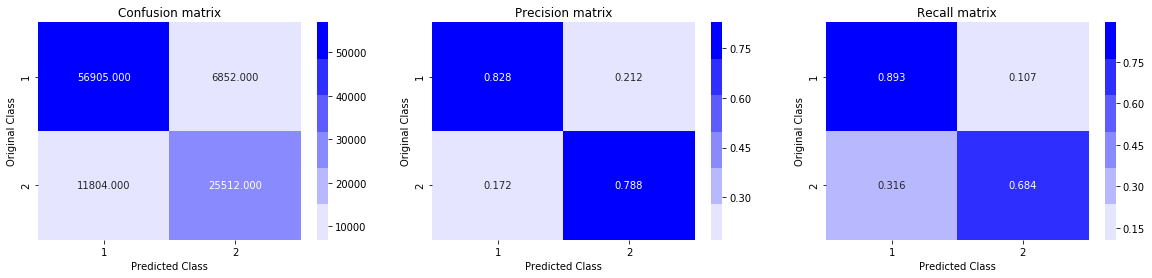

Wall time: 5min 30s


In [0]:
%%time
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(X_train_sc, y_train_tf)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train_tf)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test_tf, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test_tf, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(X_train_sc, y_train_tf)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train_tf)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tf, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tf, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_tf, predicted_y)

## 5.5 XG Boost with hyperparameter tuning 

In [0]:
%%time
params={
    "max_depth":[4,5,6,7,8],
    'n_estimators':[50,80,100,125,150],
    "min_child_weight": [1,3,5,7],
    'gamma':[0.25,0.5,0.75],
    'subsample':[0.6,0.7,0.8],
    'colsample_bytree':[0.5,0.6,0.7]
     }
x_model=xgb.XGBClassifier(learning_rate=0.01,objective='binary:logistic',eta=0.02,silent=False,verbose=10,n_jobs=-1)
xgb_random_search=RandomizedSearchCV(x_model,params,scoring='neg_log_loss',n_jobs=-1,cv=3,verbose=10,random_state=0)
xgb_random_search.fit(X_train_sc,y_train_tf)
print("Best Score:",xgb_random_search.best_score_)
print("Best Params",xgb_random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 50.2min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 75.4min remaining:  8.4min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 82.9min finished


Best Score: -0.4100938254350353
Best Params {'subsample': 0.6, 'n_estimators': 150, 'min_child_weight': 3, 'max_depth': 7, 'gamma': 0.75, 'colsample_bytree': 0.7}
Wall time: 1h 26min 37s


In [0]:
%%time
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 7
params['subsample'] = 0.6
params['n_estimators'] = 150
params['min_child_weight'] = 3
params['gamma'] = 0.75
params['colsample_bytree'] = 0.7

d_train = xgb.DMatrix(X_train_sc, label=y_train_tf)
d_test = xgb.DMatrix(X_test_sc, label=y_test_tf)

watchlist = [(d_train, 'train'), (d_test, 'valid')]
bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train_sc,y_train_tf)
predict_y = bst.predict(d_test)
print("\nThe test log loss is:",log_loss(y_test_tf, predict_y, labels=[0, 1], eps=1e-15))

[0]	train-logloss:0.684159	valid-logloss:0.684223
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.606699	valid-logloss:0.607055
[20]	train-logloss:0.548887	valid-logloss:0.549325
[30]	train-logloss:0.506651	valid-logloss:0.507433
[40]	train-logloss:0.47442	valid-logloss:0.475374
[50]	train-logloss:0.449219	valid-logloss:0.450361
[60]	train-logloss:0.429497	valid-logloss:0.430886
[70]	train-logloss:0.413213	valid-logloss:0.414857
[80]	train-logloss:0.400101	valid-logloss:0.401972
[90]	train-logloss:0.389746	valid-logloss:0.391824
[100]	train-logloss:0.380655	valid-logloss:0.383024
[110]	train-logloss:0.373361	valid-logloss:0.37591
[120]	train-logloss:0.36722	valid-logloss:0.369968
[130]	train-logloss:0.362115	valid-logloss:0.365148
[140]	train-logloss:0.357764	valid-logloss:0.361006
[150]	train-logloss:0.353911	valid-logloss:0.357416
[160]	train-logloss:0.350659	va

Total number of data points : 101073


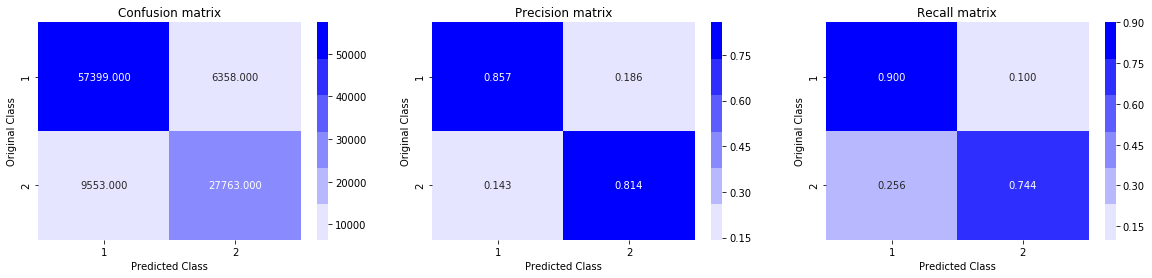

In [0]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_tf, predicted_y)

## 5.6 XG Boost with hyperparameter tuning for TFIDF-W2V

In [0]:
# avoid decoding problems
df = pd.read_csv("ttrain.csv")
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [0]:
# merge texts
questions = list(df['question1']) + list(df['question2'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [0]:
import en_core_web_md

In [0]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = en_core_web_md.load()

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(X_train_tf.Text)):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)

100%|████████████████████████████████████████████████████████████████████████| 303217/303217 [1:11:27<00:00, 64.78it/s]


In [0]:
vecs2 = []
for qu2 in tqdm(list(X_test_tf.Text)):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc1), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)

100%|██████████████████████████████████████████████████████████████████████████| 101073/101073 [24:22<00:00, 70.65it/s]


In [0]:
X_train_tf2 = X_train_tf.drop('Text',axis=1)
X_test_tf2 = X_test_tf.drop('Text',axis=1)

In [0]:
from scipy.sparse import hstack
X_train2 = hstack((X_train_tf2,vecs1))
X_test2 = hstack((X_test_tf2,vecs2))

In [0]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler(with_mean=False)
X_train_sc2 = scale.fit_transform(X_train2)
X_test_sc2 = scale.transform(X_test2)

In [0]:
%%time
params={
    "max_depth":[4,5,6,7,8],
    'n_estimators':[50,80,100,125,150],
    "min_child_weight": [1,3,5,7],
    'gamma':[0.25,0.5,0.75],
    'subsample':[0.6,0.7,0.8],
    'colsample_bytree':[0.5,0.6,0.7]
     }
x_model=xgb.XGBClassifier(learning_rate=0.01,objective='binary:logistic',eta=0.02,silent=False,verbose=10,n_jobs=-1)
xgb_random_search=RandomizedSearchCV(x_model,params, error_score='raise',scoring='neg_log_loss',n_jobs=-1,cv=3,verbose=10,random_state=0)
xgb_random_search.fit(X_train_sc2,y_train_tf)
print("Best Score:",xgb_random_search.best_score_)
print("Best Params",xgb_random_search.best_params_)

In [0]:
%%time
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 7
params['subsample'] = 0.6
params['n_estimators'] = 150
params['min_child_weight'] = 3
params['gamma'] = 0.75
params['colsample_bytree'] = 0.7

d_train = xgb.DMatrix(X_train_sc2, label=y_train_tf)
d_test = xgb.DMatrix(X_test_sc2, label=y_test_tf)

watchlist = [(d_train, 'train'), (d_test, 'valid')]
bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train_sc2,y_train_tf)
predict_y = bst.predict(d_test)
print("\nThe test log loss is:",log_loss(y_test_tf, predict_y, labels=[0, 1], eps=1e-15))

In [0]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_tf, predicted_y)

## 5.7 Results

In [0]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Model", "Test log-loss with TF_IDF weighted word2Vec", "Test log-loss with TF_IDF Vectors"]
x.add_row(["Logistic regression", 0.52, 0.38])
x.add_row([" Linear-SVM", 0.49, 0.396])
x.add_row(["XGBoost", 0.357, 0.329])

print(x)

+---------------------+---------------------------------------------+-----------------------------------+
|        Model        | Test log-loss with TF_IDF weighted word2Vec | Test log-loss with TF_IDF Vectors |
+---------------------+---------------------------------------------+-----------------------------------+
| Logistic regression |                     0.52                    |                0.38               |
|      Linear-SVM     |                     0.49                    |               0.396               |
|       XGBoost       |                    0.357                    |               0.329               |
+---------------------+---------------------------------------------+-----------------------------------+


## 5.8 Conclusions

1. Hyperparameter tuning for Logistic Regression, Linear SVM & XG Boost has been done for TF-IDF Vectors.
2. Confusion,Precision & Recall matrix has been plotted for these models.
3. Data has been splitted into train & Test set before TFIDF Vectorizations.
4. Feature engineering also has been done.
5. Using TF-IDF VEctors instead  of TF_IDF weighted word2Vec for all the three models results in reducing test log loss.